# Final Project: AI in Enterprises systems

# About the project : Fake News Classification system

# About the Dataset: 

# train.csv: A full training dataset with the following attributes:
# id: unique id for a news article
# title: the title of a news article
# author: author of the news article
# text: the text of the article; could be incomplete
# label: a label that marks the article as potentially real or fake

# test.csv: A testing training dataset with all the same attributes at train.csv without the label. 

# Link of the dataset: https://www.kaggle.com/c/fake-news/data

# Exploring dataset

In [1]:
#Importing essential libraries for exploring dataset
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kaggle_fake_train.csv')

In [3]:
df.shape

(20800, 5)

In [4]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

# Data Visualization

In [5]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

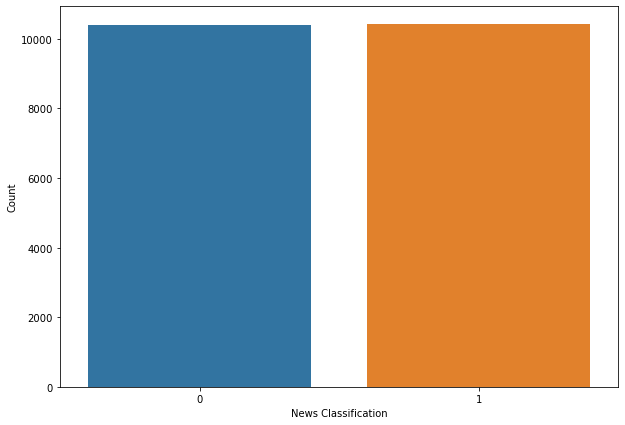

In [6]:
# Visualizing the count of 'fake news' in the dataset
#Real news =1 and Fake news =0
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# There are title and the text data. The reason we are going with the title because it will save time to predict the text weather it is fake or not based on the title of the news. Secondly, it will save the computation cost.

# Data Preprocessing and cleaning the dataset

In [8]:
#Dropping the id column
df.drop('id', axis=1, inplace=True)

In [9]:
#Checking if is there any Nun Values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [10]:
#Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [11]:
df.isna().any()

title     False
author    False
text      False
label     False
dtype: bool

In [12]:
df.shape

(18285, 4)

In [13]:
news = df.copy()

In [14]:
news.reset_index(inplace=True)

In [15]:
#imorting the libraries for cleaning the data
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Cleaning the news
corpus = []
lm = WordNetLemmatizer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmetising the words
  words = [lm.lemmatize(word) for word in words]

  # Joining the lemmetised words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [17]:
corpus[0:100]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [18]:
len(corpus)

18285

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=3, max_df = 0.75, max_features=None, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()


In [20]:
X.shape

(18285, 13351)

In [21]:
y = news['label']

In [22]:
# Creating a pickle file for the CountVectorizer
import pickle
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

# Splitting the Dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Model Creation

# Naive Bayes Model

In [24]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [26]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.89%
Precision score is: 0.9
Recall score is: 0.89


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [28]:
nb_cm

array([[1883,  157],
       [ 176, 1441]], dtype=int64)

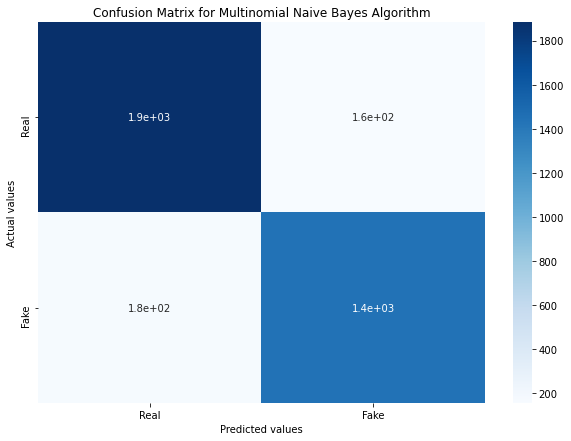

In [29]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Creating Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [32]:
# Predicting the Test set results
rf_y_pred = rf_classifier.predict(X_test)

In [33]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.49%
Precision score is: 0.9
Recall score is: 0.97


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [35]:
rf_cm

array([[1857,  183],
       [  55, 1562]], dtype=int64)

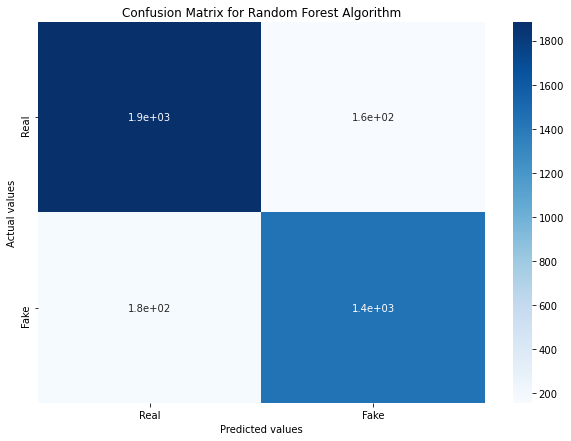

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

# Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
lr_y_pred = lr_classifier.predict(X_test)

In [39]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.68%
Precision score is: 0.89
Recall score is: 0.97


In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [41]:
lr_cm

array([[1850,  190],
       [  41, 1576]], dtype=int64)

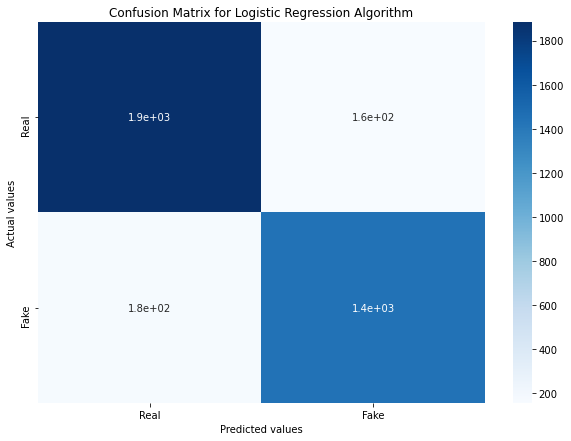

In [42]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()


# The Best Model

# We can see that the Logistic Regression Model is performing very well. Hence We are going with the Logistic Regression Model.

# Prediction System

In [43]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  lm = WordNetLemmatizer()
  final_news = [lm.lemmatize(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [44]:
df_test = pd.read_csv('kaggle_fake_test.csv')

In [45]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [46]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [47]:
news_title = df_test['title']

In [48]:
news_title.shape

(5200,)

In [49]:
news_title.head()

0    Specter of Trump Loosens Tongues, if Not Purse...
1    Russian warships ready to strike terrorists ne...
2    #NoDAPL: Native American Leaders Vow to Stay A...
3    Tim Tebow Will Attempt Another Comeback, This ...
4                      Keiser Report: Meme Wars (E995)
Name: title, dtype: object

In [50]:
sample_news = news_title[70]

In [51]:
print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('FAKE news!')
else:
  print('REAL news.')

News: TERROR THREAT WARNING MONDAY | RedFlag News
FAKE news!


In [52]:
sample_news = news_title[200]

In [53]:
print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('FAKE news!')
else:
  print('REAL news.')

News: Music World Bands Together Against YouTube, Seeking Change to Law - The New York Times
REAL news.


# Exporting the Pickle file

In [55]:
#pickle file output
import pickle
file = 'Logistic_model.pkl'
pickle.dump(lr_classifier, open(file, 'wb'))

# Further, We have deployed our model in heroku platform.
# Link to the Web app: https://fakenewsappdata.herokuapp.com/